In [83]:
import pandas as pd
import numpy as np
from functools import reduce
from sklearn.model_selection import KFold
from sklearn.svm import SVC 
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve,auc
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt 

#### Figure 2(b)

In [56]:
# threshold--65%: 6 overlapped gene pairs
com_gene_pair_symbol=pd.read_csv("/home/Task/02_stable_reverse_gene_pair/com_65%_gene_pairs.csv")
train_data = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/merge_train_encoding.csv")
com_gene_pair_symbol = list(com_gene_pair_symbol.apply(lambda x: x[0]+"|"+x[1], axis=1))  
new_cols = ['label'] + com_gene_pair_symbol
train_data = train_data.loc[:,new_cols]
x_train = train_data.iloc[:,1:7] 
y_train = train_data.iloc[:,0] 
x_np = np.array(x_train)
y_np = np.array(y_train)
train_data

,label,CAMK2G|POLR3A,DTNA|ATG14,GPAA1|SPIDR,HINT2|LATS1,STARD5|CALB2,TTC39A|MFN1
0,1,-1,1,1,-1,1,-1
1,1,1,-1,-1,-1,1,-1
2,1,-1,-1,-1,-1,-1,1
3,1,-1,-1,-1,-1,1,1
4,1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
148,0,1,1,1,1,1,1
149,0,1,1,1,1,1,1
150,0,1,-1,1,1,-1,1
151,0,1,1,1,1,1,1


In [69]:
def model_svm(x_np,y_np):
    kf = KFold(n_splits=3,shuffle=True,random_state=42)
    model = SVC(probability=True,random_state=42)
    true_labels = []
    pre_labels = []
    pre_probas = []
    for train_index, test_index in kf.split(x_np):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x_np[train_index], x_np[test_index]
        Y_train, Y_test = y_np[train_index], y_np[test_index]
        model.fit(X_train, Y_train) 
        pre_label = model.predict(X_test) 
        pre_labels = np.concatenate([pre_labels, pre_label])  
        pre_proba = model.predict_proba(X_test)[:,1]
        pre_probas = np.concatenate([pre_probas, pre_proba])
        true_labels = np.concatenate([true_labels, Y_test]) 
        auc = roc_auc_score(true_labels,pre_probas)
        print(auc)
    model_result = pd.DataFrame({"true_label":true_labels, "pre_label":pre_labels, "pre_proba":pre_probas})
    return model_result
    
def model_xgb(x_np,y_np):
    kf = KFold(n_splits=3,shuffle=True,random_state=42)
    model = XGBClassifier(random_state=42)
    true_labels = []
    pre_labels = []
    pre_probas = []
    for train_index, test_index in kf.split(x_np):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x_np[train_index], x_np[test_index]
        Y_train, Y_test = y_np[train_index], y_np[test_index]
        model.fit(X_train, Y_train) 
        pre_label = model.predict(X_test) 
        pre_labels = np.concatenate([pre_labels, pre_label])  
        pre_proba = model.predict_proba(X_test)[:,1]
        pre_probas = np.concatenate([pre_probas, pre_proba])
        true_labels = np.concatenate([true_labels, Y_test]) 
        auc = roc_auc_score(true_labels,pre_probas)
        print(auc)
    model_result = pd.DataFrame({"true_label":true_labels, "pre_label":pre_labels, "pre_proba":pre_probas})
    return model_result
    
def model_lr(x_np,y_np):
    kf = KFold(n_splits=3,shuffle=True,random_state=42)
    model = LogisticRegression(random_state=42)
    true_labels = []
    pre_labels = []
    pre_probas = []
    for train_index, test_index in kf.split(x_np):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x_np[train_index], x_np[test_index]
        Y_train, Y_test = y_np[train_index], y_np[test_index]
        model.fit(X_train, Y_train) 
        pre_label = model.predict(X_test) 
        pre_labels = np.concatenate([pre_labels, pre_label])  
        pre_proba = model.predict_proba(X_test)[:,1]
        pre_probas = np.concatenate([pre_probas, pre_proba])
        true_labels = np.concatenate([true_labels, Y_test]) 
        auc = roc_auc_score(true_labels,pre_probas)
        print(auc)
    model_result = pd.DataFrame({"true_label":true_labels, "pre_label":pre_labels, "pre_proba":pre_probas})
    return model_result
    
def model_rf(x_np,y_np):
    kf = KFold(n_splits=3,shuffle=True,random_state=42)
    model = RandomForestClassifier(random_state=42)
    true_labels = []
    pre_labels = []
    pre_probas = []
    for train_index, test_index in kf.split(x_np):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x_np[train_index], x_np[test_index]
        Y_train, Y_test = y_np[train_index], y_np[test_index]
        model.fit(X_train, Y_train) 
        pre_label = model.predict(X_test) 
        pre_labels = np.concatenate([pre_labels, pre_label])  
        pre_proba = model.predict_proba(X_test)[:,1]
        pre_probas = np.concatenate([pre_probas, pre_proba])
        true_labels = np.concatenate([true_labels, Y_test]) 
        auc = roc_auc_score(true_labels,pre_probas)
        print(auc)
    model_result = pd.DataFrame({"true_label":true_labels, "pre_label":pre_labels, "pre_proba":pre_probas})
    return model_result

In [70]:
svm = model_svm(x_np,y_np)
xgb = model_xgb(x_np,y_np)
lr = model_lr(x_np,y_np)
rf = model_rf(x_np,y_np)

TRAIN: [  0   1   2   3   5   6   7   8  10  13  14  17  20  21  23  24  25  28
  33  34  35  37  38  39  40  41  43  44  46  47  48  49  50  52  53  54
  56  57  58  59  60  61  62  63  67  70  71  72  73  74  77  79  80  82
  83  85  87  88  89  91  92  93  95  98  99 100 101 102 103 105 106 107
 110 112 116 117 118 119 120 121 122 124 125 126 129 130 133 137 138 139
 140 141 143 144 145 146 147 148 149 150 151 152] TEST: [  4   9  11  12  15  16  18  19  22  26  27  29  30  31  32  36  42  45
  51  55  64  65  66  68  69  75  76  78  81  84  86  90  94  96  97 104
 108 109 111 113 114 115 123 127 128 131 132 134 135 136 142]
0.5277777777777778
TRAIN: [  1   2   3   4   6   9  11  12  13  14  15  16  17  18  19  20  21  22
  26  27  29  30  31  32  36  37  38  41  42  45  46  48  50  51  52  54
  55  57  58  59  61  63  64  65  66  68  69  71  72  74  75  76  78  79
  81  84  86  87  88  90  91  92  94  96  97  99 100 102 103 104 106 107
 108 109 111 113 114 115 116 117 120 121 123 1

/usr/anaconda/opt/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/anaconda/opt/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.5580808080808081
TRAIN: [  1   2   3   4   6   9  11  12  13  14  15  16  17  18  19  20  21  22
  26  27  29  30  31  32  36  37  38  41  42  45  46  48  50  51  52  54
  55  57  58  59  61  63  64  65  66  68  69  71  72  74  75  76  78  79
  81  84  86  87  88  90  91  92  94  96  97  99 100 102 103 104 106 107
 108 109 111 113 114 115 116 117 120 121 123 124 126 127 128 129 130 131
 132 133 134 135 136 139 142 143 145 147 150 152] TEST: [  0   5   7   8  10  23  24  25  28  33  34  35  39  40  43  44  47  49
  53  56  60  62  67  70  73  77  80  82  83  85  89  93  95  98 101 105
 110 112 118 119 122 125 137 138 140 141 144 146 148 149 151]
[06:55:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5288299663299664
TRAIN: [  0   4   5   7   8   9  10  11  12  15  16  18  19  22  23  24  2

/usr/anaconda/opt/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.5017301038062283
TRAIN: [  0   1   2   3   5   6   7   8  10  13  14  17  20  21  23  24  25  28
  33  34  35  37  38  39  40  41  43  44  46  47  48  49  50  52  53  54
  56  57  58  59  60  61  62  63  67  70  71  72  73  74  77  79  80  82
  83  85  87  88  89  91  92  93  95  98  99 100 101 102 103 105 106 107
 110 112 116 117 118 119 120 121 122 124 125 126 129 130 133 137 138 139
 140 141 143 144 145 146 147 148 149 150 151 152] TEST: [  4   9  11  12  15  16  18  19  22  26  27  29  30  31  32  36  42  45
  51  55  64  65  66  68  69  75  76  78  81  84  86  90  94  96  97 104
 108 109 111 113 114 115 123 127 128 131 132 134 135 136 142]
0.5429292929292929
TRAIN: [  1   2   3   4   6   9  11  12  13  14  15  16  17  18  19  20  21  22
  26  27  29  30  31  32  36  37  38  41  42  45  46  48  50  51  52  54
  55  57  58  59  61  63  64  65  66  68  69  71  72  74  75  76  78  79
  81  84  86  87  88  90  91  92  94  96  97  99 100 102 103 104 106 107
 108 109 111 113 114 115 11

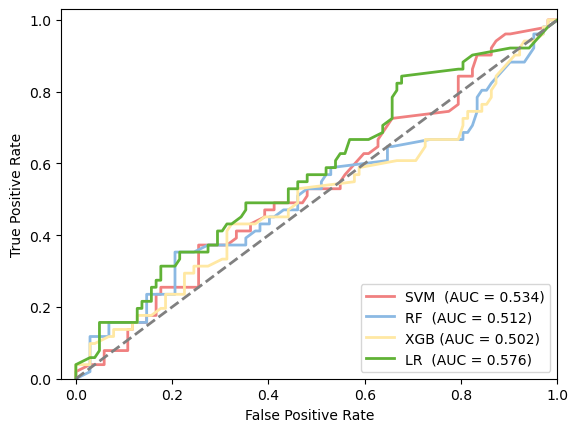

In [74]:
xgb_fpr,xgb_tpr,xgb_thresholds = roc_curve(xgb.true_label, xgb.pre_proba)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)
lr_fpr,lr_tpr,lr_thresholds = roc_curve(lr.true_label, lr.pre_proba)
lr_roc_auc = auc(lr_fpr, lr_tpr)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(svm.true_label, svm.pre_proba)
svm_roc_auc = auc(svm_fpr, svm_tpr)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(rf.true_label, rf.pre_proba)
rf_roc_auc = auc(rf_fpr, rf_tpr)
plt.figure()
plt.plot(svm_fpr, svm_tpr,color='lightcoral',lw=2,label='SVM  (AUC = %0.3f)' % svm_roc_auc)
plt.plot(rf_fpr,rf_tpr,color='#8bb9e3',lw=2, label='RF  (AUC = %0.3f)' % rf_roc_auc)
plt.plot(xgb_fpr,xgb_tpr,color='#ffe8a3',lw=2, label='XGB (AUC = %0.3f)' % xgb_roc_auc)
plt.plot(lr_fpr,lr_tpr,color='#60b236',lw=2,label='LR  (AUC = %0.3f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([-0.03, 1.00])
plt.ylim([0.00, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

#### Figure 2(d)

In [75]:
# threshold--60%: 75 overlapped gene pairs, 11 gene pairs have the same expresiion patterns
train_data = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/common_pattern/merge_train_encoding.csv")
x_train = train_data.iloc[:,1:12] 
y_train = train_data.iloc[:,0] 
x_np = np.array(x_train)
y_np = np.array(y_train)
x_train

,ARG2|CDK7,ARG2|CUL5,ARG2|DHRS2,ARG2|FLVCR1,ARG2|PLCL2,CAPN13|PPP1R9A,FBXL12|LPAR1,GALE|FGD6,MAU2|SYNPO,TEX10|SYK,UNC5D|ZNF283
0,-1,-1,-1,-1,-1,1,-1,-1,1,1,1
1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1
2,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1
3,1,1,1,1,1,1,1,-1,1,1,1
4,1,1,-1,1,1,1,-1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
148,1,1,1,1,1,-1,-1,-1,1,1,1
149,1,1,1,1,1,1,1,-1,1,1,1
150,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1
151,1,1,1,-1,1,-1,-1,-1,1,1,1


In [76]:
svm = model_svm(x_np,y_np)
xgb = model_xgb(x_np,y_np)
lr = model_lr(x_np,y_np)
rf = model_rf(x_np,y_np)

TRAIN: [  0   1   2   3   5   6   7   8  10  13  14  17  20  21  23  24  25  28
  33  34  35  37  38  39  40  41  43  44  46  47  48  49  50  52  53  54
  56  57  58  59  60  61  62  63  67  70  71  72  73  74  77  79  80  82
  83  85  87  88  89  91  92  93  95  98  99 100 101 102 103 105 106 107
 110 112 116 117 118 119 120 121 122 124 125 126 129 130 133 137 138 139
 140 141 143 144 145 146 147 148 149 150 151 152] TEST: [  4   9  11  12  15  16  18  19  22  26  27  29  30  31  32  36  42  45
  51  55  64  65  66  68  69  75  76  78  81  84  86  90  94  96  97 104
 108 109 111 113 114 115 123 127 128 131 132 134 135 136 142]
0.8813131313131313
TRAIN: [  1   2   3   4   6   9  11  12  13  14  15  16  17  18  19  20  21  22
  26  27  29  30  31  32  36  37  38  41  42  45  46  48  50  51  52  54
  55  57  58  59  61  63  64  65  66  68  69  71  72  74  75  76  78  79
  81  84  86  87  88  90  91  92  94  96  97  99 100 102 103 104 106 107
 108 109 111 113 114 115 116 117 120 121 123 1

/usr/anaconda/opt/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/anaconda/opt/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8611111111111112
TRAIN: [  1   2   3   4   6   9  11  12  13  14  15  16  17  18  19  20  21  22
  26  27  29  30  31  32  36  37  38  41  42  45  46  48  50  51  52  54
  55  57  58  59  61  63  64  65  66  68  69  71  72  74  75  76  78  79
  81  84  86  87  88  90  91  92  94  96  97  99 100 102 103 104 106 107
 108 109 111 113 114 115 116 117 120 121 123 124 126 127 128 129 130 131
 132 133 134 135 136 139 142 143 145 147 150 152] TEST: [  0   5   7   8  10  23  24  25  28  33  34  35  39  40  43  44  47  49
  53  56  60  62  67  70  73  77  80  82  83  85  89  93  95  98 101 105
 110 112 118 119 122 125 137 138 140 141 144 146 148 149 151]
[07:06:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8457491582491582
TRAIN: [  0   4   5   7   8   9  10  11  12  15  16  18  19  22  23  24  2

/usr/anaconda/opt/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8454440599769318
TRAIN: [  0   1   2   3   5   6   7   8  10  13  14  17  20  21  23  24  25  28
  33  34  35  37  38  39  40  41  43  44  46  47  48  49  50  52  53  54
  56  57  58  59  60  61  62  63  67  70  71  72  73  74  77  79  80  82
  83  85  87  88  89  91  92  93  95  98  99 100 101 102 103 105 106 107
 110 112 116 117 118 119 120 121 122 124 125 126 129 130 133 137 138 139
 140 141 143 144 145 146 147 148 149 150 151 152] TEST: [  4   9  11  12  15  16  18  19  22  26  27  29  30  31  32  36  42  45
  51  55  64  65  66  68  69  75  76  78  81  84  86  90  94  96  97 104
 108 109 111 113 114 115 123 127 128 131 132 134 135 136 142]
0.8375420875420875
TRAIN: [  1   2   3   4   6   9  11  12  13  14  15  16  17  18  19  20  21  22
  26  27  29  30  31  32  36  37  38  41  42  45  46  48  50  51  52  54
  55  57  58  59  61  63  64  65  66  68  69  71  72  74  75  76  78  79
  81  84  86  87  88  90  91  92  94  96  97  99 100 102 103 104 106 107
 108 109 111 113 114 115 11

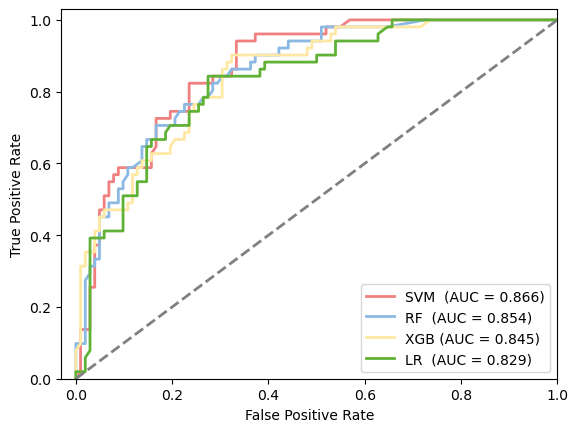

In [77]:
xgb_fpr,xgb_tpr,xgb_thresholds = roc_curve(xgb.true_label, xgb.pre_proba)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)
lr_fpr,lr_tpr,lr_thresholds = roc_curve(lr.true_label, lr.pre_proba)
lr_roc_auc = auc(lr_fpr, lr_tpr)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(svm.true_label, svm.pre_proba)
svm_roc_auc = auc(svm_fpr, svm_tpr)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(rf.true_label, rf.pre_proba)
rf_roc_auc = auc(rf_fpr, rf_tpr)
plt.figure()
plt.plot(svm_fpr, svm_tpr,color='lightcoral',lw=2,label='SVM  (AUC = %0.3f)' % svm_roc_auc)
plt.plot(rf_fpr,rf_tpr,color='#8bb9e3',lw=2, label='RF  (AUC = %0.3f)' % rf_roc_auc)
plt.plot(xgb_fpr,xgb_tpr,color='#ffe8a3',lw=2, label='XGB (AUC = %0.3f)' % xgb_roc_auc)
plt.plot(lr_fpr,lr_tpr,color='#60b236',lw=2,label='LR  (AUC = %0.3f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([-0.03, 1.00])
plt.ylim([0.00, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

#### Figure 2(e)

In [80]:
mic_ifs = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/weighted_mic_ifs.csv")
anova_ifs = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/weighted_anova_ifs.csv")
mrmr_ifs = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/weighted_mrmr_ifs.csv")

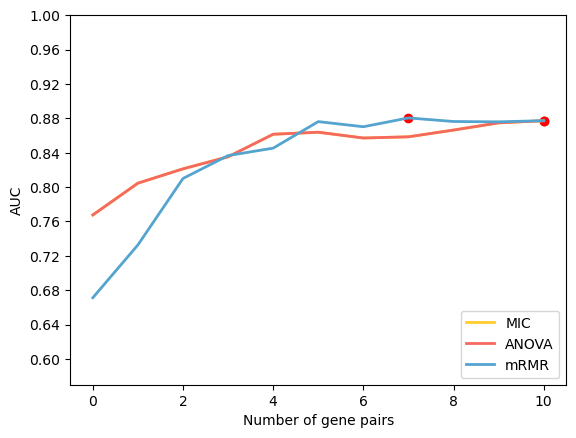

In [82]:
plt.plot(mic_ifs.AUC,label='MIC',linewidth=2, color='#ffcd2f')
plt.plot(anova_ifs.AUC,label='ANOVA',linewidth=2, color='#f56960')
plt.plot(mrmr_ifs.AUC,label='mRMR', linewidth=2, color='#54a4cf')
plt.scatter(np.argmax(mic_ifs.AUC), mic_ifs.AUC[np.argmax(mic_ifs.AUC)], marker='o', color='red')
plt.scatter(np.argmax(anova_ifs.AUC), anova_ifs.AUC[np.argmax(anova_ifs.AUC)], marker='o', color='red')
plt.scatter(np.argmax(mrmr_ifs.AUC), mrmr_ifs.AUC[np.argmax(mrmr_ifs.AUC)], marker='o', color='red')
plt.xlabel("Number of gene pairs")
plt.ylabel("AUC")
plt.ylim(0.57, 1.00)
y_major_locator=MultipleLocator(0.04)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
plt.legend(loc="lower right")

#### Figure 2(f)

In [84]:
mic_ifs = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/merged_mic_ifs.csv")
anova_ifs = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/merged_anova_ifs.csv")
mrmr_ifs = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/merged_mrmr_ifs.csv")

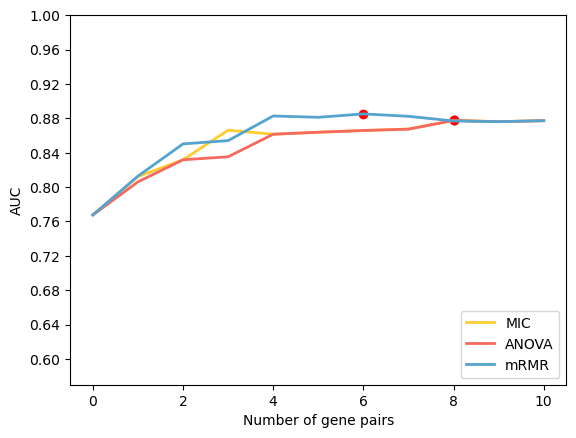

In [85]:
plt.plot(mic_ifs.AUC,label='MIC',linewidth=2, color='#ffcd2f')
plt.plot(anova_ifs.AUC,label='ANOVA',linewidth=2, color='#f56960')
plt.plot(mrmr_ifs.AUC,label='mRMR', linewidth=2, color='#54a4cf')
plt.scatter(np.argmax(mic_ifs.AUC), mic_ifs.AUC[np.argmax(mic_ifs.AUC)], marker='o', color='red')
plt.scatter(np.argmax(anova_ifs.AUC), anova_ifs.AUC[np.argmax(anova_ifs.AUC)], marker='o', color='red')
plt.scatter(np.argmax(mrmr_ifs.AUC), mrmr_ifs.AUC[np.argmax(mrmr_ifs.AUC)], marker='o', color='red')
plt.xlabel("Number of gene pairs")
plt.ylabel("AUC")
plt.ylim(0.57, 1.00)
y_major_locator=MultipleLocator(0.04)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
plt.legend(loc="lower right")

#### Figure 2(g)

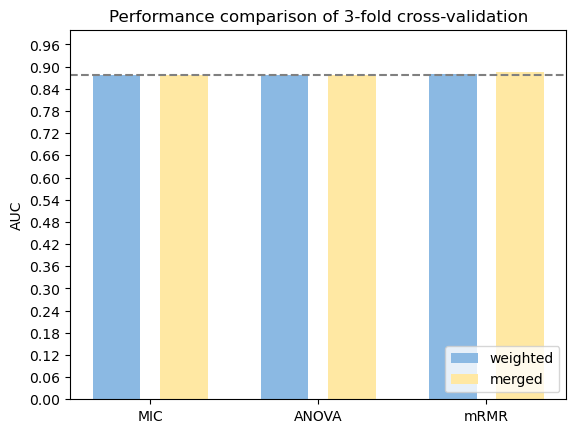

In [87]:
def create_multi_bars(labels, datas, tick_step, group_gap, bar_gap,ylabel,title):
    x = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap  
    color = ['#8bb9e3','#ffe8a3','#95CFCD']
    name = ['weighted','merged'] 
    for index, y in enumerate(datas):
        plt.bar(x + index*bar_span, y, bar_width, color=color[index],label=name[index])   
    plt.ylabel(ylabel)
    plt.title(title)
    ticks = x + (group_width - bar_span) / 2
    plt.xticks(ticks, labels)
    y_major_locator = MultipleLocator(0.06)
    plt.ylim(0.00,1.00)
    ax = plt.gca() 
    ax.yaxis.set_major_locator(y_major_locator) 
    ax.axhline(y=0.877, color='gray', linestyle='--')
    plt.legend(loc="lower right")
    
label = ['MIC','ANOVA', 'mRMR']
name = ['weighted','merged']
weighted = [0.877,0.877,0.880]
merged = [0.877,0.877,0.886]
data = [weighted,merged]
create_multi_bars(label,data, 6, 1.2, 4.1,'AUC','Performance comparison of 3-fold cross-validation',)

#### Figure2 (h)

In [103]:
train_data = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/common_pattern/merge_train_encoding.csv")
test_data = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/common_pattern/merge_test_encoding.csv")
merge_mrmr = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/common_pattern/merge_mrmr_order.csv")
selected_gene_pair = merge_mrmr.Feature[0:7]
x_train = train_data.loc[:,selected_gene_pair] 
y_train = train_data.iloc[:,0] 
x_np = np.array(x_train)
y_np = np.array(y_train)
x_test = test_data.loc[:,selected_gene_pair]
y_test = test_data.label

In [104]:
kf = KFold(n_splits=3,shuffle=True,random_state=42)
svm_model = SVC(C=0.5,kernel="rbf",gamma=0.03125,probability=True,random_state=42)
true_labels = []
pre_labels = []
pre_probas = []
score_cv_auc_list = []
for train_index, test_index in kf.split(x_np):
    X_train, X_test = x_np[train_index], x_np[test_index]
    Y_train, Y_test = y_np[train_index], y_np[test_index]
    svm_model.fit(X_train,Y_train) 
    pre_label = svm_model.predict(X_test) 
    pre_labels = np.concatenate([pre_labels,pre_label])  
    pre_proba = svm_model.predict_proba(X_test)[:,1]
    pre_probas = np.concatenate([pre_probas,pre_proba])
    true_labels = np.concatenate([true_labels,Y_test])
    score_cv_auc_list.append(roc_auc_score(Y_test,pre_proba))

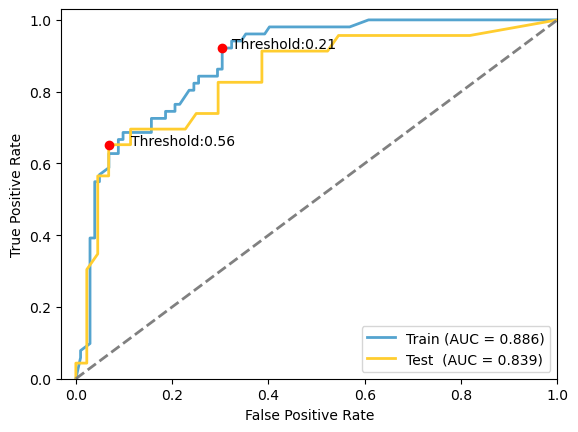

In [105]:
cv3_fpr, cv3_tpr, cv_thresholds = roc_curve(true_labels, pre_probas)
cv3_roc_auc = auc(cv3_fpr, cv3_tpr)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,  svm_model.predict_proba(x_test.values)[:,1])
test_roc_auc = auc(test_fpr, test_tpr)
cv3_youden_scores = cv3_tpr - cv3_fpr
cv3_best_threshold_index = np.argmax(cv3_youden_scores)
cv3_best_threshold = cv_thresholds[cv3_best_threshold_index]
test_youden_scores = test_tpr - test_fpr
test_best_threshold_index = np.argmax(test_youden_scores)
test_best_threshold = test_thresholds[test_best_threshold_index]
lw = 2
plt.plot(cv3_fpr,cv3_tpr,color="#54a4cf",lw=lw, label='Train (AUC = %0.3f)' % cv3_roc_auc)
plt.plot(cv3_fpr[cv3_best_threshold_index], cv3_tpr[cv3_best_threshold_index], c='red', marker='o')
plt.text(cv3_fpr[cv3_best_threshold_index+1], cv3_tpr[cv3_best_threshold_index], f'Threshold:{cv3_best_threshold:.2f}')
plt.plot(test_fpr, test_tpr,color="#ffcd2f",lw=lw, label='Test  (AUC = %0.3f)' % test_roc_auc)
plt.plot(test_fpr[test_best_threshold_index], test_tpr[test_best_threshold_index], c='red', marker='o')
plt.text(test_fpr[test_best_threshold_index+1], test_tpr[test_best_threshold_index], f'Threshold:{test_best_threshold:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")